In [332]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm

In [336]:
fm.fontManager.addfont('../references/cmunorm.ttf')
#matplotlib.rc('xtick', labelsize=14) 
#matplotlib.rc('ytick', labelsize=14)
matplotlib.rcParams['font.family'] = 'CMU Concrete'
plt.rc('axes', unicode_minus=False)

In [477]:
main_df = pd.read_csv('../data/processed_data.tsv', sep='\t', encoding='utf8', na_values=pd.NA).convert_dtypes()
main_df.doc_date = pd.to_datetime(main_df.doc_date)
main_df.origin_date = pd.to_datetime(main_df.origin_date)
#main_df.delta = pd.to_timedelta(main_df.delta, unit='days')
main_df = main_df[main_df.delta.isin(range(0,100))]

In [613]:
df = pd.read_csv('../data/coordinates.tsv', sep='\t', encoding='utf8')
df.columns = ['name', 'latitude', 'longitude']

In [614]:
df['freq'] = [len(main_df[main_df.placename==name]) for name in df.name]

In [615]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs='EPSG:4326')
gdf.to_crs(crs='ESRI:102013', inplace=True)
gdf

,name,latitude,longitude,freq,geometry
0,Paris,48.85341,2.34880,25852,POINT (-554406.090 2097734.851)
1,London,51.50853,-0.12574,21720,POINT (-691523.642 2415570.122)
2,Berlin,52.52437,13.41053,20787,POINT (228347.869 2487544.608)
3,St. Petersburg,59.93863,30.31413,20149,POINT (1114033.457 3473062.666)
4,Wien,48.20849,16.37208,14936,POINT (468421.663 2016668.697)
...,...,...,...,...,...
366,Newcastle,54.97328,-1.61396,24,POINT (-730630.568 2816627.211)
367,Nyborg,55.31274,10.78964,24,POINT (49554.122 2797118.458)
368,Poltawa,49.58925,34.55367,27,POINT (1722268.199 2442922.880)
369,Lüneburg,53.25090,10.41409,23,POINT (27340.034 2564271.564)


In [616]:
land = gpd.read_file('../data/geo/ne_50m_land.zip')
land.to_crs(crs='ESRI:102013', inplace=True)

(-15939278.60198906, 15939534.551114142)
(-8391347.395288724, 19889157.795860805)


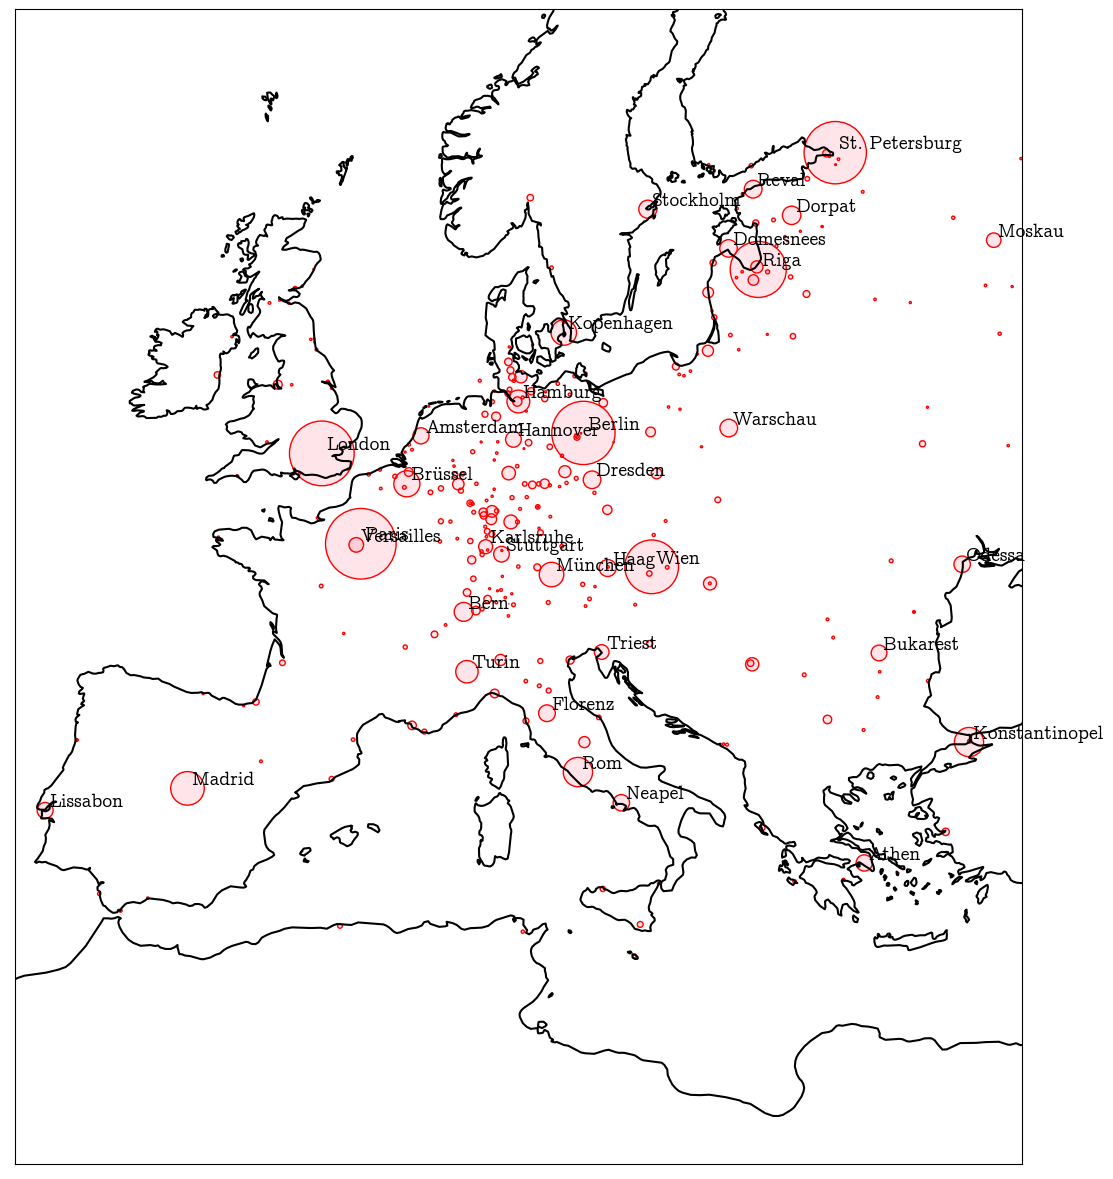

In [619]:
def plot(gdf, land, min_freq):    
    
    fig, ax = plt.subplots(figsize=(15,15))
    
    land.boundary.plot(ax=ax, color='black')
    
    gdf.plot(ax=ax, markersize=gdf['freq']/10, edgecolor='red', facecolor=(1, 0, 0.2, 0.1))

    for x, y, freq, label in zip(gdf.geometry.x, gdf.geometry.y, gdf.freq, gdf.name):
        if freq > min_freq:
            ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=14)

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    print(xlim)
    print(ylim)
    ax.set_xlim(xlim[0]/9, xlim[1]/9)
    ax.set_ylim(ylim[0]/100, ylim[1]/5)

    plt.xticks([])
    plt.yticks([])
    #plt.rc('axes', unicode_minus=False)
    plt.show()
    
    
plot(gdf, land, 1000)

In [641]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'), crs='EPSG:4326')
#world.to_crs(crs='ESRI:102013', inplace=True)
gdf2 = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs='EPSG:4326')

In [636]:
countries = {}

for country in world.name:
    countries[country] = list(gdf2.name[gdf.geometry.within(world.geometry[world.name==country].values[0]) == True])

In [643]:
list(gdf2.name[gdf2.geometry.within(world.geometry[world.name=='Germany'])==True])

C:\Users\krister\miniconda3\envs\geo\lib\site-packages\geopandas\base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


['Bonn']

In [645]:
gdf2.geometry.within(world.geometry[world.name=='Germany'])

C:\Users\krister\miniconda3\envs\geo\lib\site-packages\geopandas\base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


0      False
1      False
2      False
3      False
4      False
       ...  
366    False
367    False
368    False
369    False
370    False
Length: 371, dtype: bool

In [628]:
countries = {key: value for key, value in countries.items() if value != []}

In [625]:
countries_reversed = {}

for key, value in countries.items():
    for place in value:
        countries_reversed[place] = key

In [626]:
countries_reversed

{}

In [603]:
import json

with open('../temp/cities_countries.json', 'w', encoding='utf8') as f:
    json.dump(countries_reversed, f)

In [602]:
'Wilna' in countries_reversed.keys()

True

In [559]:
[1,2,3] + [4,5,6]

[1, 2, 3, 4, 5, 6]

In [604]:
found_names = []
for key, value in countries.items():
    found_names = found_names + value

In [605]:
len(found_names)

283

In [606]:
for name in df.name:
    if name not in found_names:
        print(name)

Konstantinopel
Domesnees
Odessa
Libau
Türkische Grenze
Bolderaa
Windau
Italienische Grenze
Korfu
Palermo
Toulon
Helsingör
Serbische Grenze
Malta
Gravesend
Spanische Grenze
Pera
Stralsund
Swinemünde
Zante
Helgoland
Baltischport
Polnische Grenze
Aberdeen
Messina
Etrl
Vlie
Caprera
Skutari
Veracruz


In [552]:
gdf2.name[gdf.geometry.within(world.geometry[world.name=='Germany'].values[0]) == True]

2           Berlin
11         München
12         Hamburg
17         Dresden
30        Hannover
          ...     
295        Detmold
297    Niederrhein
299    Nieder-Elbe
300           Elbe
310      Paderborn
Name: name, Length: 81, dtype: object

In [548]:
gdf2.loc[11, 'geometry'].within(world.geometry[121])

True

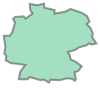

In [551]:
world.geometry[world.name=='Germany'].values[0]

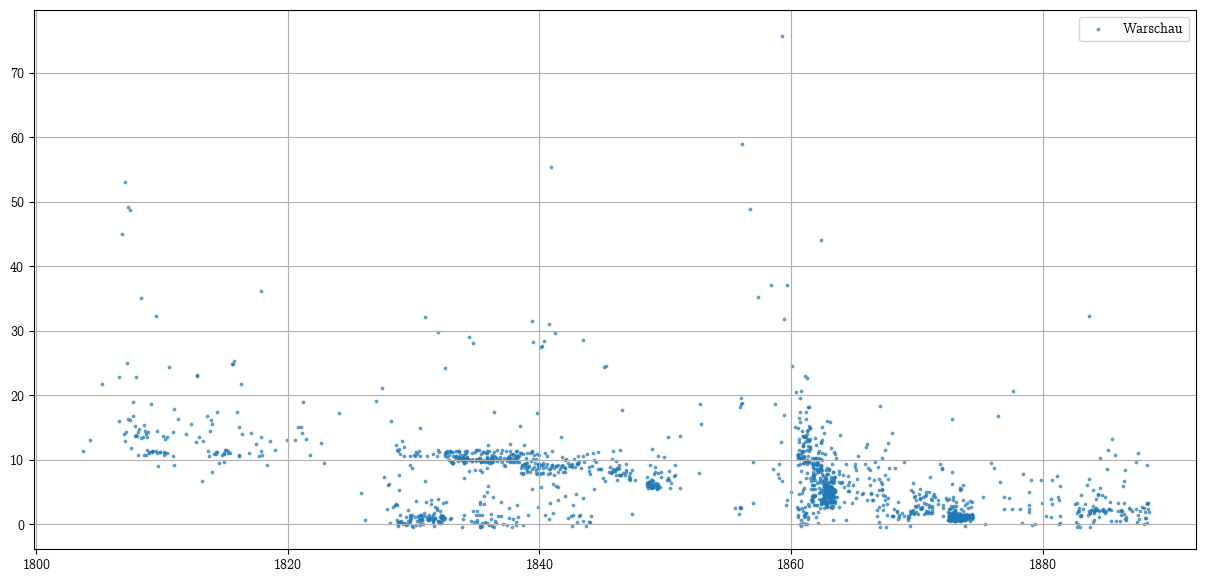

In [608]:
plot_speed_distribution(['Warschau'])

In [612]:
main_df[main_df.placename=='Born']

,doc_id,doc_date,placename,day,day2,month,month2,origin_year,start,end,origin_date,delta
36091,60717,1839-06-06,Born,5,<NA>,6,<NA>,<NA>,167,180,1839-06-05,1
36664,61698,1839-10-17,Born,2,<NA>,10,<NA>,<NA>,2103,2120,1839-10-02,15
36733,61806,1839-10-28,Born,10,<NA>,10,<NA>,<NA>,28,47,1839-10-10,18
37709,63592,1840-06-22,Born,19,<NA>,6,<NA>,<NA>,1204,1218,1840-06-19,3
37740,63650,1840-07-02,Born,17,<NA>,6,<NA>,<NA>,1668,1683,1840-06-17,15
66501,103438,1850-08-22,Born,20,<NA>,8,<NA>,<NA>,332,351,1850-08-20,2
68936,105475,1851-02-02,Born,27,<NA>,10,<NA>,1850,4623,4644,1850-10-27,98
93191,129778,1856-03-15,Born,22,<NA>,2,<NA>,<NA>,3097,3114,1856-02-22,22
140546,174392,1866-03-29,Born,1,<NA>,4,<NA>,<NA>,24,39,1866-03-20,9
191460,225644,1875-10-10,Born,8,20,10,<NA>,<NA>,1410,1434,1875-10-08,2


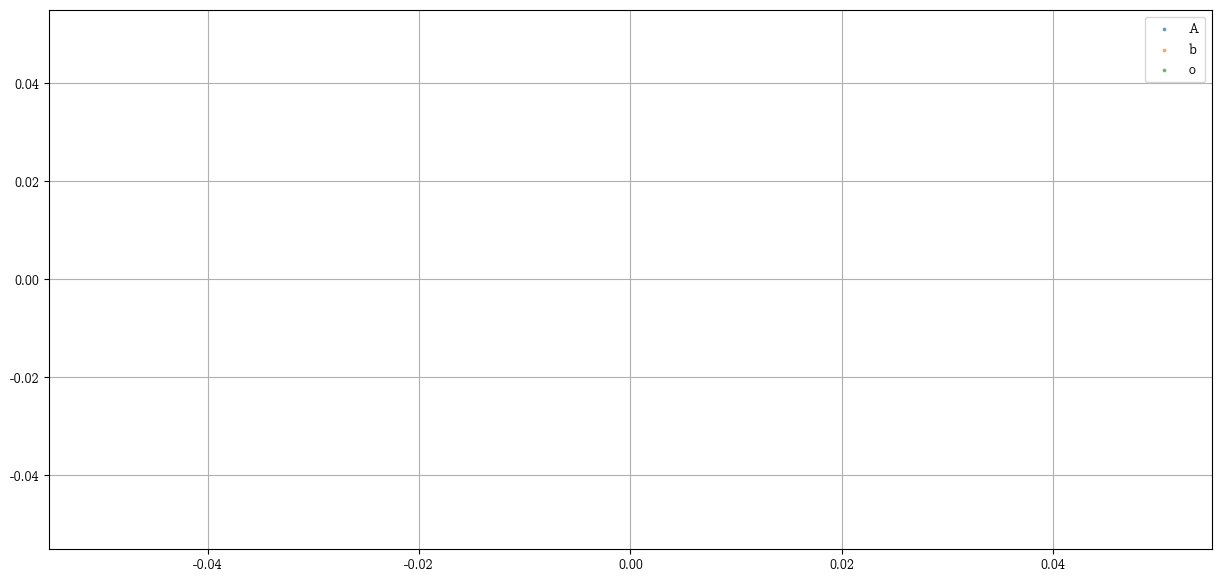

In [611]:
plot_speed_distribution('Abo')